In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('zoo.csv')
data

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [3]:
data.isnull().sum()

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f990174c390>,
      dtype=object)

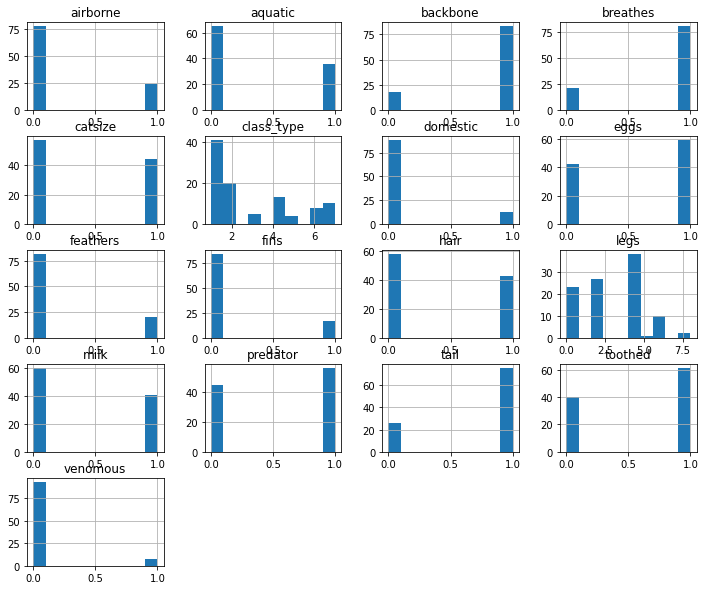

In [4]:
data.hist(figsize=(12,10))

In [6]:
data_corr = data.corr()
data_corr

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
hair,1.000000,-0.427851,-0.817382,0.878503,-0.198431,-0.473554,-0.154769,0.492531,0.191681,0.441149,-0.104245,-0.280313,0.394009,0.048973,0.207208,0.455020,-0.562384
feathers,-0.427851,1.000000,0.419248,-0.410761,0.656553,-0.058552,-0.104430,-0.613631,0.231403,0.254588,-0.145739,-0.223541,-0.206686,0.292569,0.031586,-0.135934,-0.197520
eggs,-0.817382,0.419248,1.000000,-0.938848,0.376646,0.376244,0.011605,-0.642150,-0.340420,-0.382777,0.098689,0.164796,-0.224918,-0.221090,-0.155610,-0.514650,0.661825
milk,0.878503,-0.410761,-0.938848,1.000000,-0.366765,-0.362613,-0.029721,0.628168,0.384958,0.423527,-0.242449,-0.156328,0.214196,0.210026,0.163928,0.574906,-0.723683
airborne,-0.198431,0.656553,0.376646,-0.366765,1.000000,-0.172638,-0.295181,-0.594311,-0.104718,0.286039,0.008528,-0.251157,0.043712,0.009482,0.063274,-0.349768,0.022677
aquatic,-0.473554,-0.058552,0.376244,-0.362613,-0.172638,1.000000,0.375978,0.053150,0.022463,-0.637506,0.087915,0.604492,-0.360638,-0.034642,-0.224308,-0.111866,0.326639
predator,-0.154769,-0.104430,0.011605,-0.029721,-0.295181,0.375978,1.000000,0.129452,0.051022,-0.262931,0.115391,0.190302,-0.099723,0.018947,-0.309794,0.144790,0.061179
toothed,0.492531,-0.613631,-0.642150,0.628168,-0.594311,0.053150,0.129452,1.000000,0.575085,-0.065690,-0.062344,0.364292,-0.193476,0.310368,0.069430,0.344010,-0.471527
backbone,0.191681,0.231403,-0.340420,0.384958,-0.104718,0.022463,0.051022,0.575085,1.000000,0.207666,-0.246611,0.209499,-0.432856,0.731762,0.101733,0.356976,-0.828845
breathes,0.441149,0.254588,-0.382777,0.423527,0.286039,-0.637506,-0.262931,-0.065690,0.207666,1.000000,-0.120752,-0.617219,0.369868,0.088952,0.124068,0.204125,-0.519308


In [7]:
data_corr['class_type'].sort_values()

backbone     -0.828845
milk         -0.723683
tail         -0.631830
hair         -0.562384
catsize      -0.521030
breathes     -0.519308
toothed      -0.471527
feathers     -0.197520
domestic     -0.181043
airborne      0.022677
predator      0.061179
fins          0.099430
legs          0.131693
venomous      0.321476
aquatic       0.326639
eggs          0.661825
class_type    1.000000
Name: class_type, dtype: float64

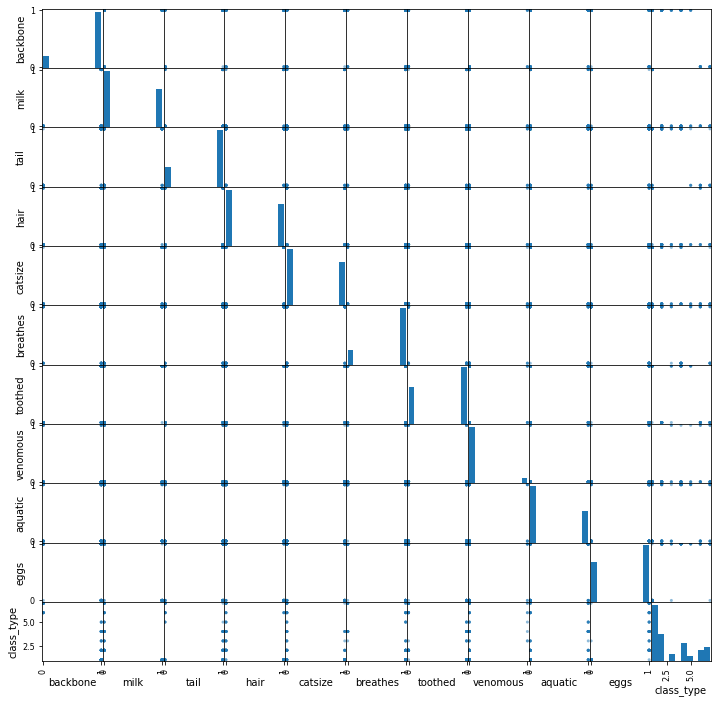

In [9]:
from pandas.plotting import scatter_matrix

attribute = ['backbone','milk','tail','hair','catsize','breathes','toothed','venomous','aquatic','eggs','class_type']

scatter = scatter_matrix(data[attribute],figsize=(12,12))

In [17]:
data_copy = data.copy()

del data_copy['feathers']
del data_copy['domestic']
del data_copy['airborne']
del data_copy['predator']
del data_copy['fins']
del data_copy['legs']
del data_copy['animal_name']

In [18]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data_copy, test_size = 0.3)

train_y = train_set['class_type']
test_y = test_set['class_type']

del train_set['class_type']
del test_set['class_type']

In [19]:
train_set

,hair,eggs,milk,aquatic,toothed,backbone,breathes,venomous,tail,catsize
77,0,1,0,1,0,0,0,1,0,0
32,1,0,1,0,1,1,1,0,0,1
34,0,1,0,1,1,1,0,0,1,0
71,0,1,0,0,0,1,1,0,1,1
86,0,1,0,1,1,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...
73,0,1,0,1,1,1,0,0,1,0
14,0,1,0,1,0,0,0,0,0,0
28,1,0,1,0,1,1,1,0,1,1
7,0,1,0,1,1,1,0,0,1,0


In [22]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth = 9)

tree_clf.fit(train_set,train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [25]:
some_data = train_set.iloc[6:10]
some_labels = train_y.iloc[6:10]
print("예측:", tree_clf.predict(some_data))
print("레이블:", list(some_labels))

예측: [2 2 3 1]
레이블: [2, 2, 3, 1]


In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(train_set, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [24]:
some_data = train_set.iloc[6:10]
some_labels = train_y.iloc[6:10]
print("예측:", knn.predict(some_data))
print("레이블:", list(some_labels))

예측: [2 2 2 1]
레이블: [2, 2, 3, 1]


In [29]:
from sklearn.metrics import mean_squared_error
predictions = tree_clf.predict(train_set)
tree_mse = mean_squared_error(train_y, predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.20701966780270625

In [30]:
predictions = knn.predict(train_set)
knn_mse = mean_squared_error(train_y, predictions)
knn_rmse = np.sqrt(knn_mse)
knn_rmse

0.35856858280031806

In [31]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_clf, train_set, train_y,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
def display_scores(scores):
    print("점수:", scores)
    print("평균:", scores.mean())
    print("표준 편차:", scores.std())

display_scores(tree_rmse_scores)

점수: [0.         0.         0.53452248 0.37796447 0.         0.
 0.         0.         0.         0.37796447]
평균: 0.1290451429843303
표준 편차: 0.2012217886189537


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


In [32]:
scores = cross_val_score(knn, train_set, train_y,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

display_scores(tree_rmse_scores)

점수: [0.37796447 0.37796447 0.53452248 0.37796447 0.         0.
 0.         0.         0.53452248 1.19522861]
평균: 0.33981669960117733
표준 편차: 0.35690580484114587


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


In [34]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=5, random_state=42)
forest_clf.fit(train_set, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [35]:
some_data = train_set.iloc[6:10]
some_labels = train_y.iloc[6:10]
print("예측:", forest_clf.predict(some_data))
print("레이블:", list(some_labels))

예측: [2 2 3 1]
레이블: [2, 2, 3, 1]


In [36]:
scores = cross_val_score(forest_clf, train_set, train_y,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)

점수: [0.         0.         0.84515425 0.37796447 0.37796447 0.
 0.         0.         0.         1.19522861]
평균: 0.2796311810081365
표준 편차: 0.4057875619891986


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


In [37]:
print("결정트리 훈련 세트의 정확도:",tree_clf.score(train_set,train_y))
print("랜덤포레스트 훈련 세트의 정확도:",forest_clf.score(train_set,train_y))
print('Kneighbor 훈련 세트의 정확도 : ', knn.score(train_set,train_y))


print("결정트리 테스트 세트의 정확도:",tree_clf.score(test_set,test_y))
print("랜덤포레스트 테스트 세트의 정확도:",forest_clf.score(test_set,test_y))
print('Kneighbor 테스트 세트의 정확도 : ', knn.score(test_set,test_y))

결정트리 훈련 세트의 정확도: 0.9571428571428572
랜덤포레스트 훈련 세트의 정확도: 0.9428571428571428
Kneighbor 훈련 세트의 정확도 :  0.8714285714285714
결정트리 테스트 세트의 정확도: 0.967741935483871
랜덤포레스트 테스트 세트의 정확도: 0.9354838709677419
Kneighbor 테스트 세트의 정확도 :  0.9032258064516129
